In [1]:
import requests
import json
import requests
from bs4 import BeautifulSoup
import csv


# Load URLs from JSON file
with open('urls.json', 'r') as f:
    urls = json.load(f)

# open a CSV file for writing
with open('news_articles.csv', mode='w', newline='') as csvfile:
    # define the fieldnames for the CSV writer
    fieldnames = ['Topic', 'Content']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()  # write the header row to the CSV file

    for url in urls:
        url_string = url["url"]
        r = requests.get(url_string)

        if r.status_code == 200:
            soup = BeautifulSoup(r.content, "html.parser")
            article = soup.find("article")
            # Get the text out of the soup and print it
            content = article.get_text()
            # print(content)

            # write the topic and content to the CSV file
            writer.writerow({'Topic': url['title'], 'Content': content})
            print(f'Successfully saved {url["title"]} to CSV')
        else:
            print(f"Error: {r.status_code}")

Successfully saved sports to CSV
Successfully saved sports to CSV
Successfully saved sports to CSV
Successfully saved business to CSV
Successfully saved business to CSV
Successfully saved business to CSV
Successfully saved technology to CSV
Successfully saved technology to CSV
Successfully saved technology to CSV
Successfully saved technology to CSV
Successfully saved sports to CSV
Successfully saved sports to CSV
Successfully saved politics to CSV
Successfully saved politics to CSV
Successfully saved politics to CSV
Successfully saved politics to CSV
Successfully saved health to CSV
Successfully saved health to CSV
Successfully saved health to CSV
Successfully saved health to CSV
Successfully saved climate to CSV
Successfully saved climate to CSV
Successfully saved climate to CSV
Successfully saved sports to CSV
Successfully saved climate to CSV
Successfully saved climate to CSV
Successfully saved climate to CSV
Successfully saved climate to CSV
Successfully saved business to CSV
Succ

TEXT CLASSIFICATION

The following are the preprocessing steps used:
- Remove punctuation
- Remove digits
- Tokenize the text into words
- Remove stop words
- Lemmatize the remaining words

In [2]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the news corpus into a Pandas DataFrame
df = pd.read_csv('news_articles.csv')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Function to preprocess text data
def preprocess_text(Content):
    # Remove punctuation
    Content = Content.translate(str.maketrans('', '', string.punctuation))
    
    # Remove digits
    Content = re.sub(r'\d+', '', Content)
    
    # Tokenize the text into words
    words = word_tokenize(Content.lower())

    # Remove stop words
    words = [w for w in words if not w in stop_words]

    # Lemmatize the remaining words
    words = [lemmatizer.lemmatize(w) for w in words]

    # Rejoin the words into a single string
    return ' '.join(words)

# Apply the preprocessing function to the news corpus and save into a new CSV file
df['Content'] = df['Content'].apply(preprocess_text)
df.to_csv('preprocessed_news_corpus.csv', index=False)
print(f'Successfully saved preprocessed data to csv')

# print(df)

[nltk_data] Downloading package wordnet to /home/silver/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Successfully saved preprocessed data to csv


- Vectorized using TF-IDF Vectorizer and adjusting the parameters to improve the quality of the features.
Adjusted min_df=4 meaning any word that appears in the corpus less than 4 times will be excluded from the vocabulary.

- Training and testing using Naive Bayes model.

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib



# Load the preprocessed news corpus
df = pd.read_csv('preprocessed_news_corpus.csv')

# Create a TF-IDF Vectorizer object
vectorizer = TfidfVectorizer()

# vectorizer = TfidfVectorizer(max_df=0.5)
vectorizer = TfidfVectorizer(min_df=4)


# Vectorize the text data
X = vectorizer.fit_transform(df['Content'])

# Get the labels
y = df['Topic']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict the categories for the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

# Save the vectorizer
joblib.dump(vectorizer, 'Tfidf_vectorizer.pkl')

# Save the classifier
joblib.dump(clf, 'NB_classifier.pkl')


Accuracy: 0.7142857142857143
Precision: 0.619047619047619
Recall: 0.7142857142857143
F1-Score: 0.6428571428571429


/home/silver/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['NB_classifier.pkl']

In [22]:
import joblib

# Load the vectorizer and the classifier
vectorizer = joblib.load('Tfidf_vectorizer.pkl')
clf = joblib.load('NB_classifier.pkl')

# Predict with new unseen data
new_data = [
    'There are multiple, feasible and effective options to reduce greenhouse gas emissions and adapt to human-caused climate change, and they are available now, said scientists in the latest report released by the Intergovernmental Panel on Climate Change (IPCC) on 20 March. “This Synthesis Report underscores the urgency of taking more ambitious action and shows that, if we act now, we can still secure a liveable sustainable future for all,',
    'There are 20 clubs in the Premier League. During the course of a season (from August to May) each club plays the others twice (a double round-robin system), once at their home stadium and once at that of their opponents, for 38 games. Teams receive three points for a win and one point for a draw. No points are awarded for a loss. Teams are ranked by total points, then goal difference, and then goals scored. If still equal, teams are deemed to occupy the same position. If there is a tie for the championship, for relegation, or for qualification to other competitions,',
    'Innovations here include AI engineering, decision intelligence, operational AI systems, ModelOps, AI cloud services, smart robots, natural language processing (NLP), autonomous vehicles, intelligent applications and computer vision.'
    ]

new_data_transformed = vectorizer.transform(new_data)
predicted_labels = clf.predict(new_data_transformed)
for label in predicted_labels:
    print(label)


climate
sports
technology


- Testing the model with new and unseen before data, my **News Classifier Model** proves to be quite efficient but for higher prediction accuracy, i would need to increase the size of my corpus by adding more news articles as well as doing more preprocessing.

CLUSTERING

- I dropped the Topic column which was the label when doing classification, then created a TfidfVectorizer object and vectorized the text data as before.
- Performed clustering using KMeans and stored the predicted cluster labels in the clusters variable.

/home/silver/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Top words in cluster 1
['uk', 'patient', 'bank', 'people', 'case', 'economy', 'rate', 'test', 'woman', 'said']

Top words in cluster 2
['climate', 'carbon', 'change', 'emission', 'gas', 'temperature', 'government', 'energy', 'report', 'co']

Top words in cluster 3
['yousaf', 'mr', 'snp', 'minister', 'first', 'scottish', 'said', 'humza', 'covid', 'new']

Top words in cluster 4
['league', 'premier', 'club', 'minute', 'win', 'season', 'united', 'team', 'city', 'cup']

Top words in cluster 5
['car', 'data', 'technology', 'france', 'project', 'company', 'city', 'official', 'human', 'like']

Top words in cluster 6
['ai', 'twitter', 'user', 'risk', 'system', 'regulator', 'firm', 'could', 'post', 'intelligence']


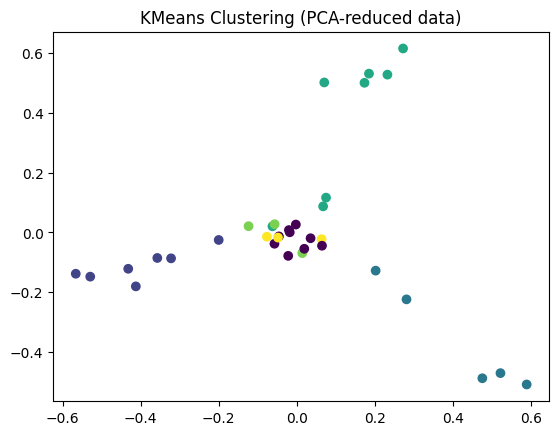

The average silhouette score is : 0.08848998477236102
The Davies-Bouldin index is : 2.3659921231089602


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score



# Load the preprocessed news corpus
df = pd.read_csv('preprocessed_news_corpus.csv')

# Drop the 'Topic' column
df.drop('Topic', axis=1, inplace=True)

# Create a TF-IDF Vectorizer object
vectorizer = TfidfVectorizer(min_df=4)

# Vectorize the text data
X = vectorizer.fit_transform(df['Content'])

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=6, random_state=45)
clusters = kmeans.fit_predict(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_


# Get the feature names
feature_names = vectorizer.vocabulary_

# Sort the feature names by their index and store them in a list
sorted_feature_names = sorted(feature_names, key=feature_names.get)

# Loop over each cluster and print the top 10 most representative words
for i, centroid in enumerate(centroids):
    print("\nTop words in cluster", i+1)
    top_words_indices = centroid.argsort()[::-1][:10]
    top_words = [sorted_feature_names[idx] for idx in top_words_indices]
    print(top_words)

# Reduce the dimensionality of the feature space to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Visualize the clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters)
plt.title('KMeans Clustering (PCA-reduced data)')
plt.show()


# Calculate the silhouette score for the clustered data
silhouette_avg = silhouette_score(X, clusters)

# Print the average silhouette score
print("The average silhouette score is :", silhouette_avg)


# Calculate the Davies-Bouldin index for the clustered data
davies_bouldin = davies_bouldin_score(X.toarray(), clusters)

# Print the Davies-Bouldin index
print("The Davies-Bouldin index is :", davies_bouldin)



- From the 6 clusters, Its clear that some news articles have very little unique keywords thus end up overlapping with other news articles.
- Those articles with a good number of unique keywords have successfully been clustered but still have outliers.
- The average silhouette score measures how similar an object is to its own cluster compared to other clusters. 
- The above score of 0.088 suggests that this clustering may not be very effective, as a good clustering would typically have a score closer to 1.
- The Davies-Bouldin index measures the average similarity between each cluster with its most similar cluster, taking into account the size of the clusters. A lower score indicates better separation between clusters. 
- The above score of 2.365 suggests that the separation between the clusters is not very good.
- Overall, these results suggest that the clustering may not be very effective in grouping together related articles or my dataset has a high dimensionality.